# Scale and Plot Bounding Box JSON Annotations

This notebook reads in a sample image and plots properly scaled bounding boxes from the corresponding JSON annotation file.  This assumes you have the main Kivy app set up on your android device and have annotated some images using the app.  Be sure to copy over the proper JSON file from your device to the json folder before beginning.

In [1]:
import json
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from convert_json import convertBB
%matplotlib inline

### Read in images and annotations

In [2]:
#image directory path
img_dir = '../test_images/'
json_name = 'test_images_bounding_box.json'

In [3]:
#load annotation json
with open(json_name) as f:
    data = json.load(f)
    
#get all image names
img_names = [img_name for img_name,_ in data.items()]

In [4]:
#read in a sample image and corresponding annotation
n = 0
img_name = img_names[n]

img = plt.imread(img_dir+img_name)
annotation = data[img_name]['annotations']

### Plot image with bouding box annotations

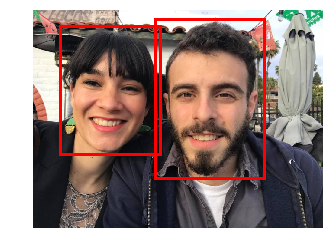

In [5]:
#plot image with annotations
fig,ax = plt.subplots(1)
ax.imshow(img)
ax.axis('off')

for _, box in annotation.items():
    px,py,width,height = convertBB(box,img.shape)
    
    rect = patches.Rectangle((px,py), width, height, linewidth=3, edgecolor='r', facecolor='none')
    ax.add_patch(rect)